In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X,y = make_moons(n_samples=100, noise=0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840


In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X,y = make_moons(n_samples=100, noise=0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#최대 깊이 제한을 둬보면 훈련세트 정확도는 살짝 줄어들고 더 일찍 끝나게 되고
#테스트도 살짝만 줄어든다.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.933
테스트 세트 정확도: 0.800


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))
#최대 깊이 제한을 둬보면 훈련세트 정확도는 살짝 줄어들고 더 일찍 끝나게 되고
#테스트도 살짝만 줄어든다.
for max_depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth = {}".format(max_depth))
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
#깊이에 따라 훈련세트와 테스트 세트 정확도가 달라지는 것을 확인할 수 있다.

X_train.shape: (426, 30) X_test.shape:(143, 30)
max_depth = 1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth = 4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth = 8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


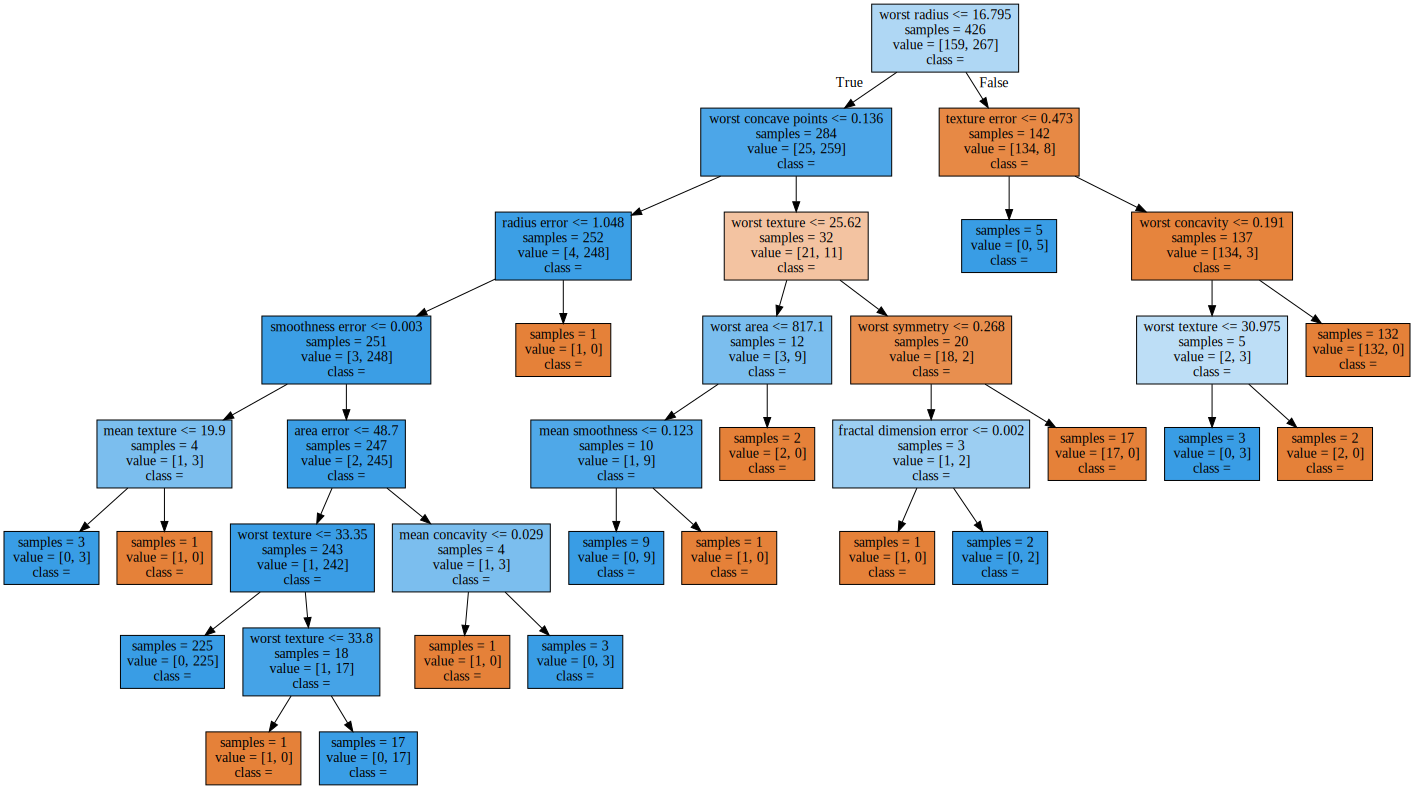

In [11]:
#결정 트리 출력
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [13]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


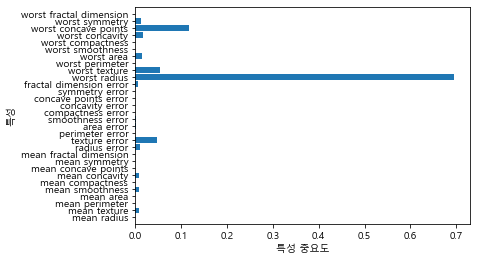

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plot_feature_importances_cancer(tree)

# 특성 중요도
# 각 특성이 얼마나 중요한지를 평가
# 0 - 1 사이 숫자
# 0 : 전혀 사용되지 않음
# 1 : 타깃 클래스를 완벽하게 예측
# 전체 합 : 1

#중요도가 낮다고 해서 유용하지 않은 것은 아님
# - 다른 특성이 동일한 정보를 지닐 수 있음

#중요도가 양수
#어떤 클래스를 지지하는지는 모름

Feature importances: [0. 1.]


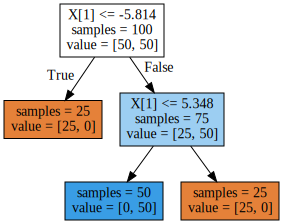

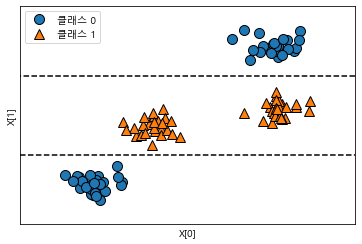

In [22]:
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

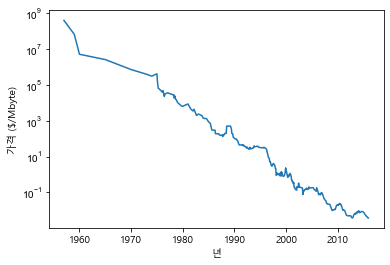

In [25]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

#컴퓨터메모리 가격동향
#x축 : 날짜
#y축 : 해당년도의 ram 1메가바이트 가격

data_train.shape: (202, 3) data_test.shape:(131, 3)


<ipython-input-38-8d8b9da51737>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-38-8d8b9da51737>:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


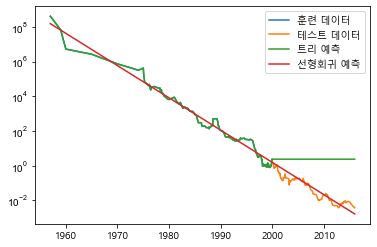

In [38]:
#결정트리회귀 vs 선형회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape:{}".format(data_test.shape))

#가격 예측을 위해  날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train) # 결정트리회귀
linear_reg = LinearRegression().fit(X_train, y_train) # 선형회귀

#예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

# 결정트리회귀
# 훈련데이터 범위 밖을 예측하는 외삽extrapolation이 불가능
# 시계열 데이터에는 잘 맞지 않음
# 등락의예측에는 적용 가능